In [2]:
# Importing Necessary Dependancies
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [3]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data(input("Enter a Stock Symbol:"))
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,196.166672,198.833328,196.000000,197.908340,106.618080,1905762
1,2010-01-05,198.683334,202.500000,198.191666,201.375000,108.485611,4657392
2,2010-01-06,202.016663,204.500000,201.199997,203.916672,109.854897,4203690
3,2010-01-07,203.500000,205.816666,201.666672,204.133331,109.971611,6394536
4,2010-01-08,204.166672,206.433334,201.666672,202.616669,109.154549,5678652


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,196.166672,198.833328,196.000000,197.908340,1905762
1,198.683334,202.500000,198.191666,201.375000,4657392
2,202.016663,204.500000,201.199997,203.916672,4203690
3,203.500000,205.816666,201.666672,204.133331,6394536
4,204.166672,206.433334,201.666672,202.616669,5678652


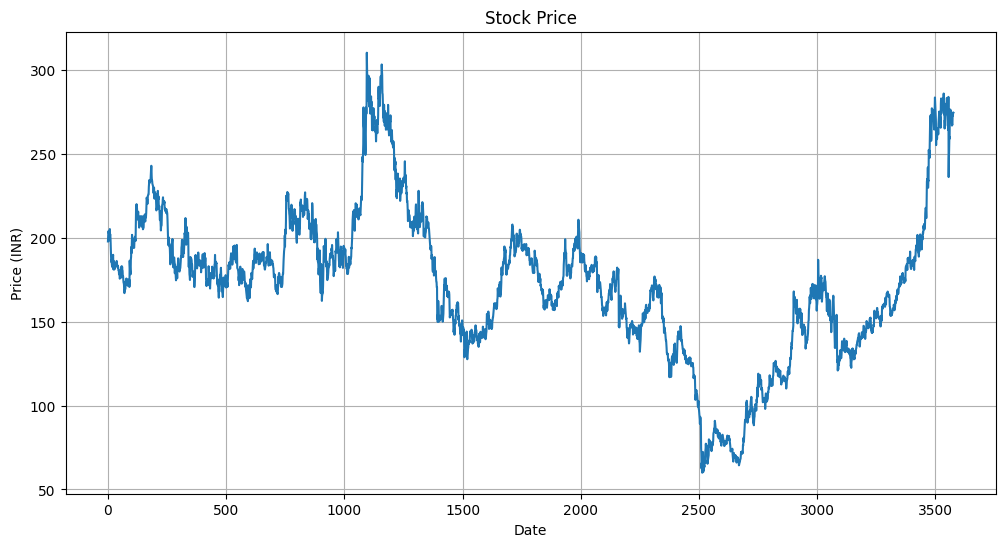

In [6]:
# Visualizing the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

,Open,High,Low,Close,Volume
0,196.166672,198.833328,196.000000,197.908340,1905762
1,198.683334,202.500000,198.191666,201.375000,4657392
2,202.016663,204.500000,201.199997,203.916672,4203690
3,203.500000,205.816666,201.666672,204.133331,6394536
4,204.166672,206.433334,201.666672,202.616669,5678652
...,...,...,...,...,...
3572,267.399994,268.100006,263.500000,267.500000,22830930
3573,269.000000,275.450012,268.350006,274.200012,19532912
3574,275.000000,275.799988,271.600006,272.950012,11750972
3575,273.200012,279.799988,271.500000,274.850006,24470518


In [8]:
# Plotting the moving average of 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3572    270.476500
3573    270.726501
3574    270.933501
3575    271.205501
3576    271.380001
Name: Close, Length: 3577, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

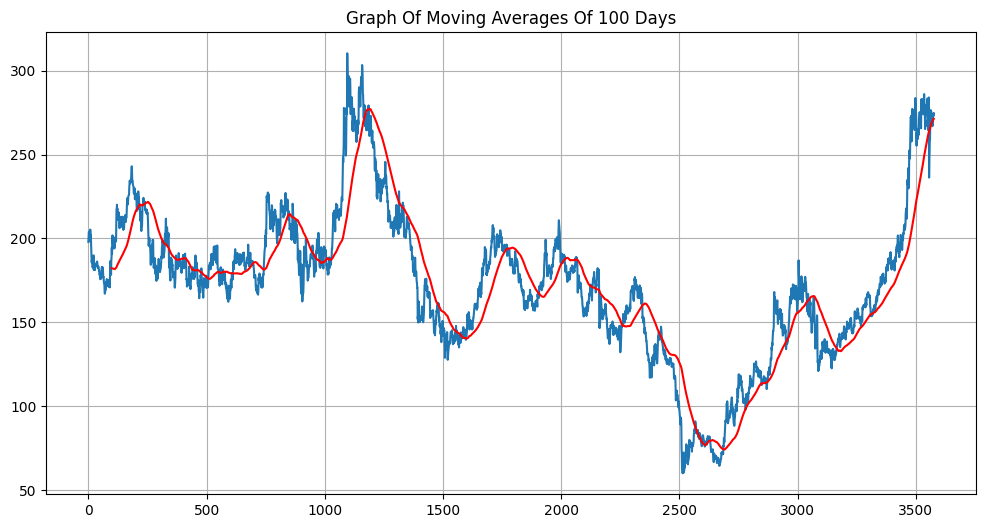

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [10]:

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3572    233.80575
3573    234.30600
3574    234.76200
3575    235.22150
3576    235.67950
Name: Close, Length: 3577, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

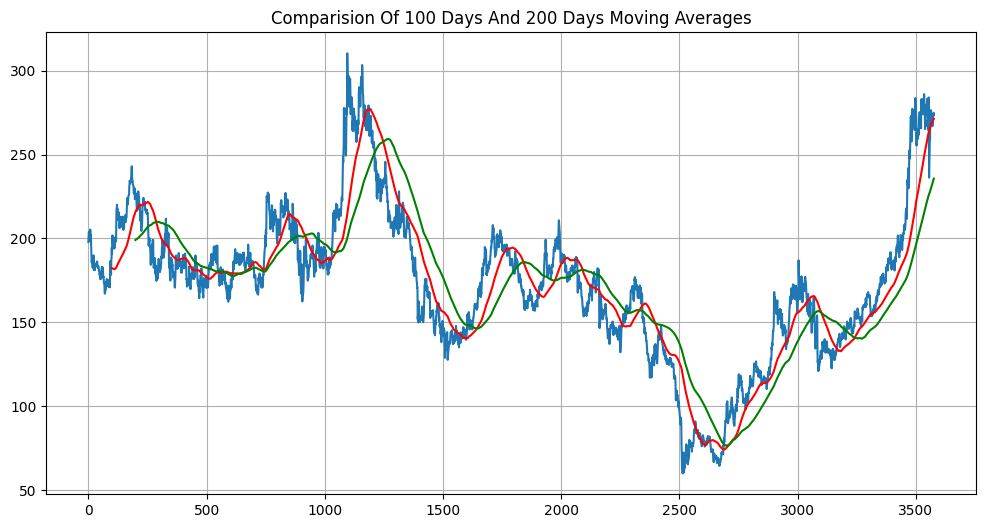

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(3577, 5)

In [13]:
# Splitting data into training (70%) and testing (30%)

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2503, 7)
(1074, 7)


In [14]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,196.166672,198.833328,196.000000,197.908340,106.618080,1905762
1,2010-01-05,198.683334,202.500000,198.191666,201.375000,108.485611,4657392
2,2010-01-06,202.016663,204.500000,201.199997,203.916672,109.854897,4203690
3,2010-01-07,203.500000,205.816666,201.666672,204.133331,109.971611,6394536
4,2010-01-08,204.166672,206.433334,201.666672,202.616669,109.154549,5678652


In [15]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2503,2020-02-28,90.300003,92.699997,89.500000,91.949997,68.369164,30416954
2504,2020-03-02,94.000000,95.000000,88.250000,89.099998,66.250053,24442896
2505,2020-03-03,90.900002,94.000000,89.650002,93.349998,69.410133,24098468
2506,2020-03-04,94.199997,94.900002,90.699997,92.800003,69.001190,22998427
2507,2020-03-05,93.349998,94.400002,92.000000,92.599998,68.852470,16357817


In [16]:
# Normalizing the Dataset using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.48165074],
       [0.49762   ],
       [0.50932828],
       ...,
       [0.01934743],
       [0.01128601],
       [0.        ]])

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
x_train.shape

(2403, 100, 1)

In [21]:
# Importing the Necessary Dependancies for the LSTM model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
# Implemnting the LSTM Model for the Prediction
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\athai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - loss: 0.0614 - mean_absolute_error: 0.1825
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - loss: 0.0085 - mean_absolute_error: 0.0716
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 0.0070 - mean_absolute_error: 0.0645
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 0.0064 - mean_absolute_error: 0.0599
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0060 - mean_absolute_error: 0.0580
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0051 - mean_absolute_error: 0.0538
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0046 - mean_absolute_error: 0.0515
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0051 - mean_absolute_error: 0.0540
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0042 - mean_absolute_error: 0.0495
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0040 - mean_absolute_error: 0.0479
Epoch 11/

In [25]:
model.save('./Models/keras_model.h5')

In [26]:
test_close.shape

(1074, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [29]:
final_df = pd.concat([past_100_days,test_df], ignore_index=True)

In [30]:
final_df.head()

,0
0,129.550003
1,126.550003
2,125.849998
3,125.500000
4,129.000000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.30760726],
       [0.29433879],
       [0.2912428 ],
       ...,
       [0.94183992],
       [0.95024326],
       [0.94957986]])

In [32]:
input_data.shape

(1174, 1)

In [33]:
# Testing the Model
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1074, 100, 1)
(1074,)


In [35]:
# Making predictions and plotting the graph of predictions vs the actual

y_pred = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step


In [36]:
y_pred.shape

(1074, 1)

In [37]:
y_test

array([0.14130914, 0.1287041 , 0.14750109, ..., 0.94183992, 0.95024326,
       0.94957986])

In [38]:
y_pred

array([[0.23219746],
       [0.22663982],
       [0.2202507 ],
       ...,
       [0.8622885 ],
       [0.86614454],
       [0.86400115]], dtype=float32)

In [39]:
scaler.scale_

array([0.00442282])

In [40]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

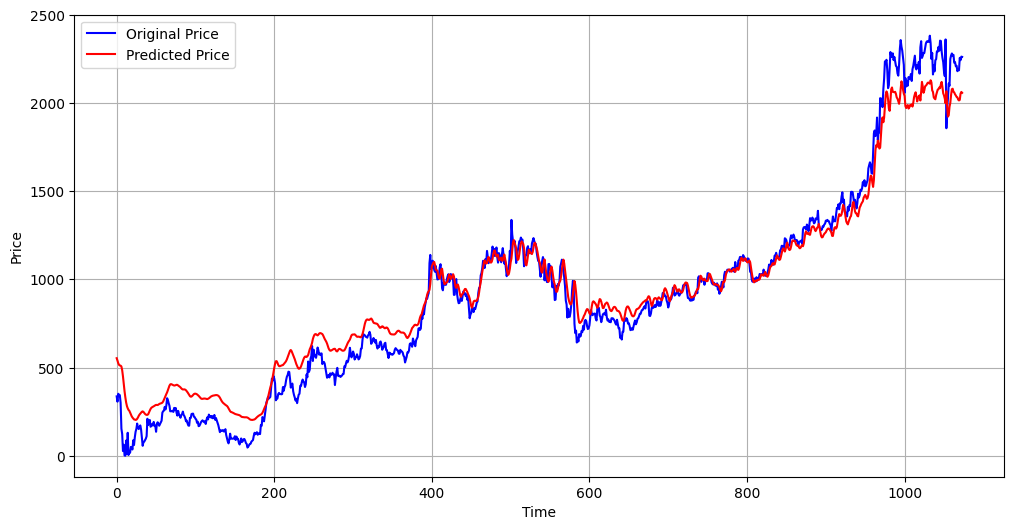

In [41]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Model Evaluation
# Calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 9.58%


In [43]:
# Calculation of R2 Score
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9632583828560713


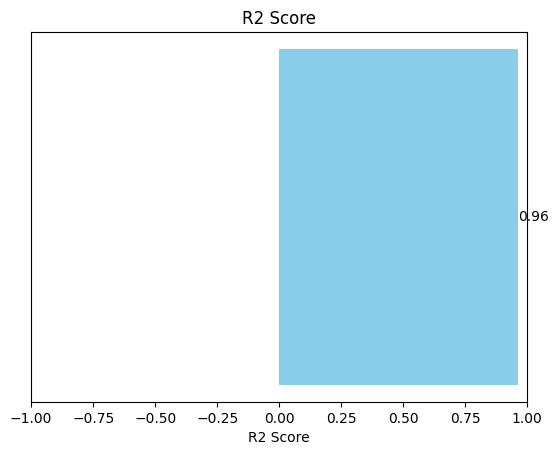

In [44]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

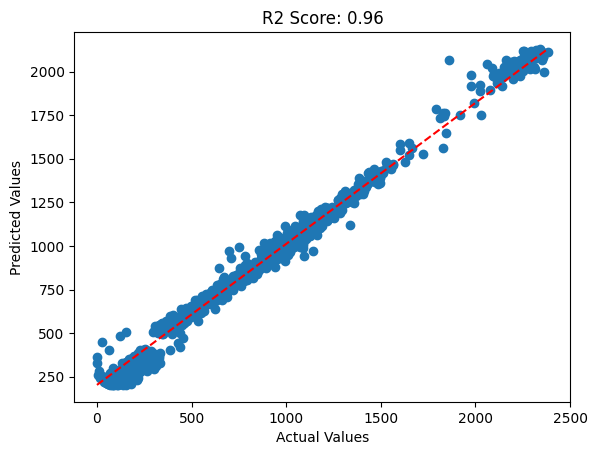

In [45]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()